In [53]:
import pandas as pd
import seaborn as sn

In [10]:
df = pd.read_csv("bhp.csv")
df.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250


In [12]:
df.shape

(13200, 7)

In [14]:
df.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,13200.000000,13200.000000,13200.000000,13200.000000,1.320000e+04
mean,1555.302783,2.691136,112.276178,2.800833,7.920337e+03
std,1237.323445,1.338915,149.175995,1.292843,1.067272e+05
min,1.000000,1.000000,8.000000,1.000000,2.670000e+02
25%,1100.000000,2.000000,50.000000,2.000000,4.267000e+03
50%,1275.000000,2.000000,71.850000,3.000000,5.438000e+03
75%,1672.000000,3.000000,120.000000,3.000000,7.317000e+03
max,52272.000000,40.000000,3600.000000,43.000000,1.200000e+07


In [24]:
percentile = df.price_per_sqft.quantile(0.999)

In [23]:
df.price_per_sqft.quantile(1)

12000000.0

In [43]:
df1 = df[df.price_per_sqft < percentile]

In [44]:
df1

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407


In [45]:
df1.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,13186.000000,13186.000000,13186.000000,13186.000000,13186.000000
mean,1555.784221,2.690429,111.595825,2.800167,6657.466100
std,1237.058719,1.337659,145.340080,1.292094,4143.188587
min,250.000000,1.000000,8.000000,1.000000,267.000000
25%,1100.000000,2.000000,50.000000,2.000000,4266.000000
50%,1275.000000,2.000000,71.610000,3.000000,5432.500000
75%,1671.500000,3.000000,120.000000,3.000000,7307.750000
max,52272.000000,40.000000,3600.000000,43.000000,50349.000000


In [46]:
mean = df1.price_per_sqft.mean()
mean

6657.466100409525

In [47]:
std_deviation = df1.price_per_sqft.std()
std_deviation

4143.188586945614

In [48]:
min_mean = mean - 4*std_deviation
min_mean

-9915.28824737293

In [49]:
max_mean = mean + 4*std_deviation
max_mean

23230.22044819198

In [76]:
df_no_outlier = df1[(df1.price_per_sqft < max_mean) & (df1.price_per_sqft >min_mean)]
df_no_outlier

,location,size,total_sqft,bath,price,bhk,price_per_sqft,ZScore
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699,-0.714055
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615,-0.492970
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305,-0.567791
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245,-0.099553
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250,-0.581066
...,...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689,0.007611
13196,other,4 BHK,3600.0,5.0,400.00,4,11111,1.074905
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258,-0.337775
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407,0.904988


<AxesSubplot:xlabel='price_per_sqft', ylabel='Count'>

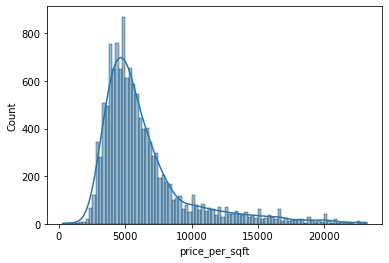

In [77]:
sn.histplot(df_no_outlier.price_per_sqft, kde = True)

In [78]:
df1['ZScore'] = (df1.price_per_sqft - df1.price_per_sqft.mean()) / df1.price_per_sqft.std()
df1

C:\Users\rhino\AppData\Local\Temp/ipykernel_21500/649253436.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['ZScore'] = (df1.price_per_sqft - df1.price_per_sqft.mean()) / df1.price_per_sqft.std()


,location,size,total_sqft,bath,price,bhk,price_per_sqft,ZScore
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699,-0.714055
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615,-0.492970
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305,-0.567791
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245,-0.099553
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250,-0.581066
...,...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689,0.007611
13196,other,4 BHK,3600.0,5.0,400.00,4,11111,1.074905
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258,-0.337775
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407,0.904988


In [80]:
df_no_outlier1 = df1[(df1.ZScore < 4) & (df1.price_per_sqft > -4)]
df_no_outlier1

,location,size,total_sqft,bath,price,bhk,price_per_sqft,ZScore
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699,-0.714055
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615,-0.492970
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305,-0.567791
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245,-0.099553
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250,-0.581066
...,...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689,0.007611
13196,other,4 BHK,3600.0,5.0,400.00,4,11111,1.074905
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258,-0.337775
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407,0.904988


<AxesSubplot:xlabel='price_per_sqft', ylabel='Count'>

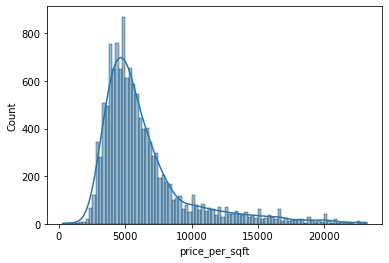

In [81]:
sn.histplot(df_no_outlier1.price_per_sqft, kde = True)

<AxesSubplot:xlabel='price_per_sqft', ylabel='Count'>

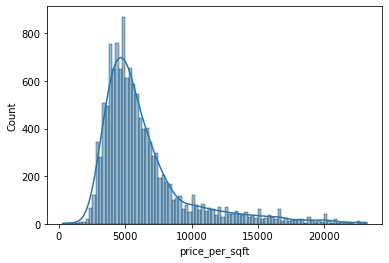

In [82]:
sn.histplot(df_no_outlier.price_per_sqft, kde = True)